In [5]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [6]:
page_id = '14'
password_response, time_response, survey_response, dids = get_responses()
survey_response_df = pd.DataFrame(survey_response)

demo = pd.json_normalize(survey_response_df[page_id])

new_index = {}
for qsid in demo.columns:
    new_index[qsid] = get_qdetails(page_id, qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index, axis=1)
demo['did'] = dids
demo['design'] = demo['did'].apply(lambda x: get_design(x))
demo.drop('did', axis=1, inplace=True)
demo['race'] = demo['race'].apply(lambda x: ','.join(x))
demo.to_csv('data/csvs/demo.csv', index=False)
demo

Total: 120; 
Attentive: 104; Non Attentive: 16


,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adopt based on security expert advice,design
0,Woman,55-59 years old,"White,Human Caucasian European",Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6,infographics
1,Man,55-59 years old,White,Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Freelance,Self-taught,Self-taught,7,conversation
2,Woman,50-54 years old,White,High School Graduate,Business,Business or industry,Self-taught,Self-taught,6,reflection
3,Man,55-59 years old,White,High School Graduate,Construction,Business or industry,Self-taught,No experience,7,reflection
4,Man,30-34 years old,White,Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5,conversation
...,...,...,...,...,...,...,...,...,...,...
99,Man,25-29 years old,White,Graduate degree (MS/Doctorate),"Medicine, Nursing, and Health Sciences",Business or industry,Formal training,Formal training,6,reflection
100,Man,30-34 years old,White,Four-year College Degree,Education,Educational institution,No experience,No experience,5,infographics
101,Man,35-39 years old,White,Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Business or industry,Hold or held a work position,Self-taught,6,reflection
102,Woman,30-34 years old,Native American or American Indian,Graduate degree (MS/Doctorate),"Mathematics, and Natural Sciences (Physics, Ch...",Educational institution,Pursuing or completed a degree,Self-taught,7,conversation


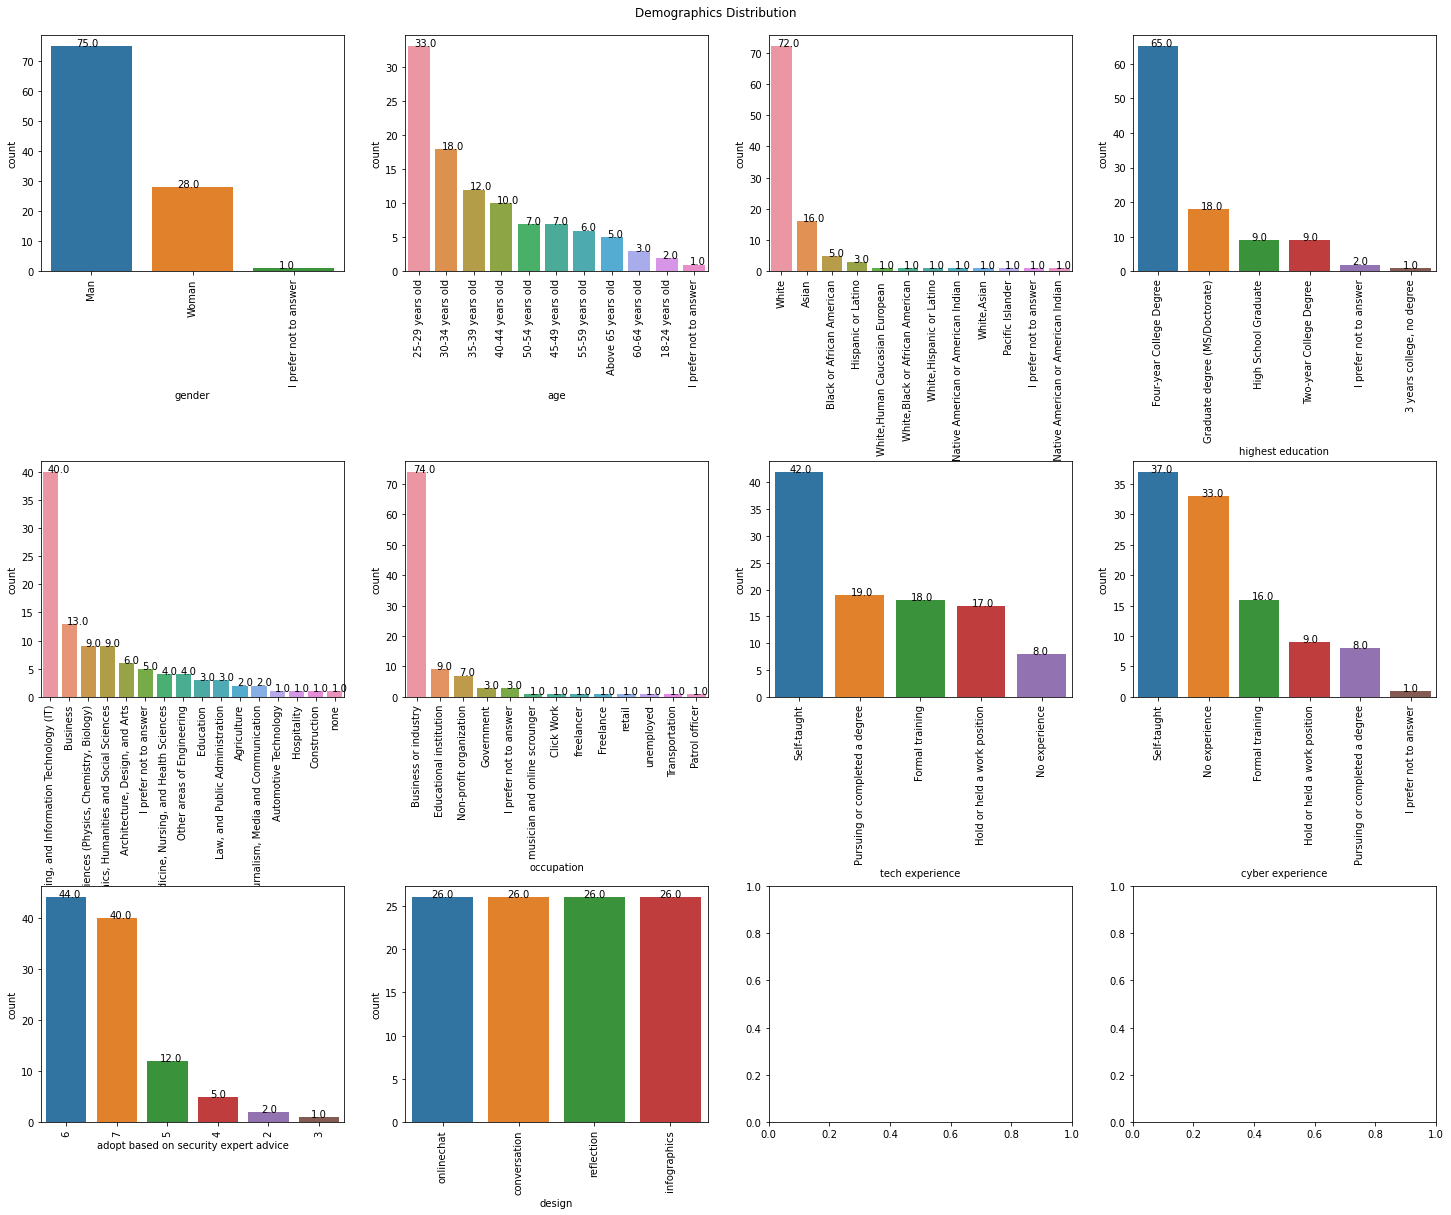

In [7]:
def col_subplot(nrows, ncols, data, title):
    fig, axes = plt.subplots(nrows, ncols, figsize=(25, 20))
    fig.subplots_adjust(hspace=0.8)
    fig.suptitle(title, y=0.9)

    k=0
    for i in range(nrows):
        for j in range(ncols):
            if k < len(data.columns):
                cat = data.columns[k]
                ax = sns.countplot(data=data, x=cat, order=data[cat].value_counts().index, ax=axes[i][j])
                ax.tick_params(axis='x', rotation=90)
                for p in ax.patches:
                    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
                k += 1
col_subplot(3, 4, demo, 'Demographics Distribution')

In [8]:
# for design in did_map.values():
#     data = demo[demo['design']==design]
#     col_subplot(3, 3, data, design)
    